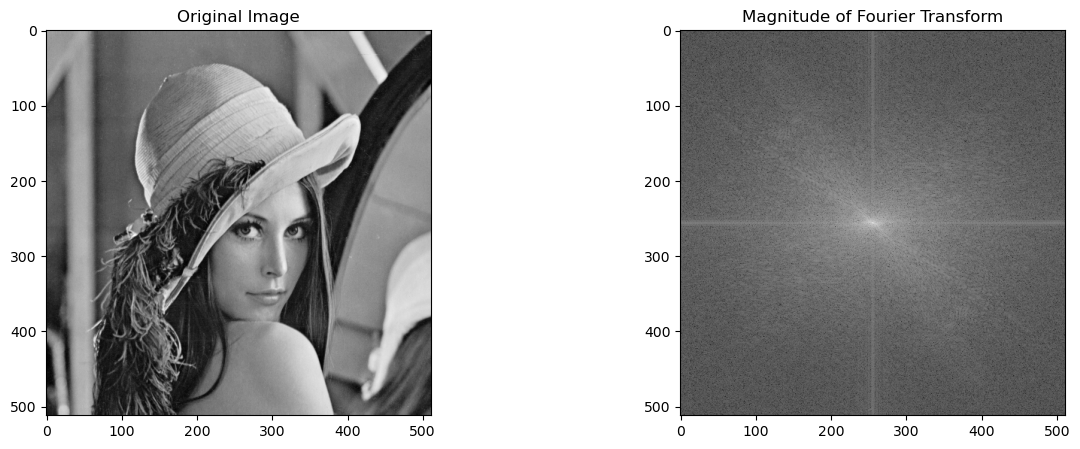

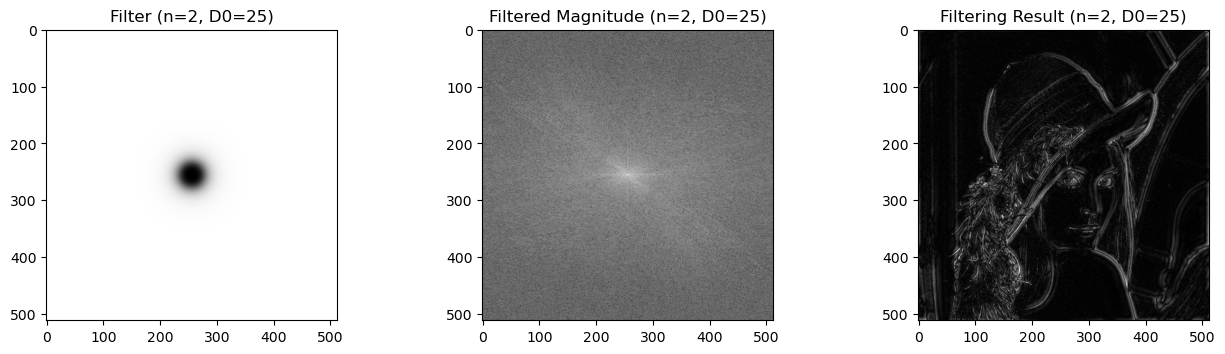

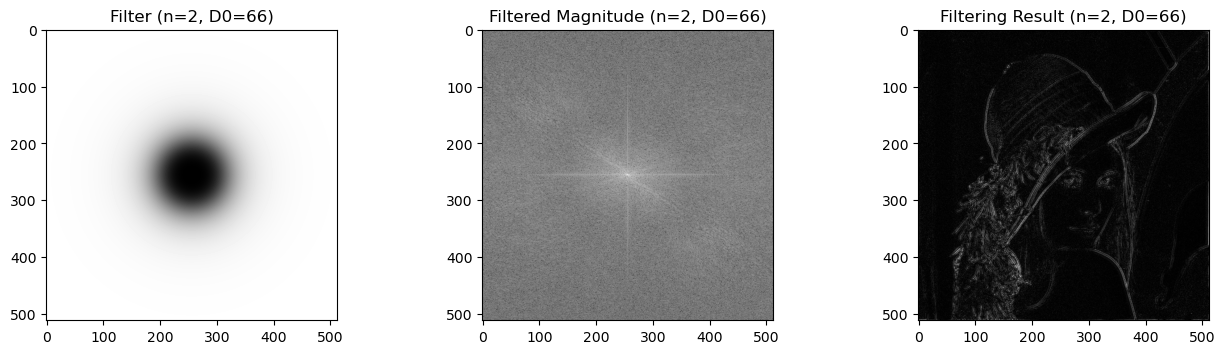

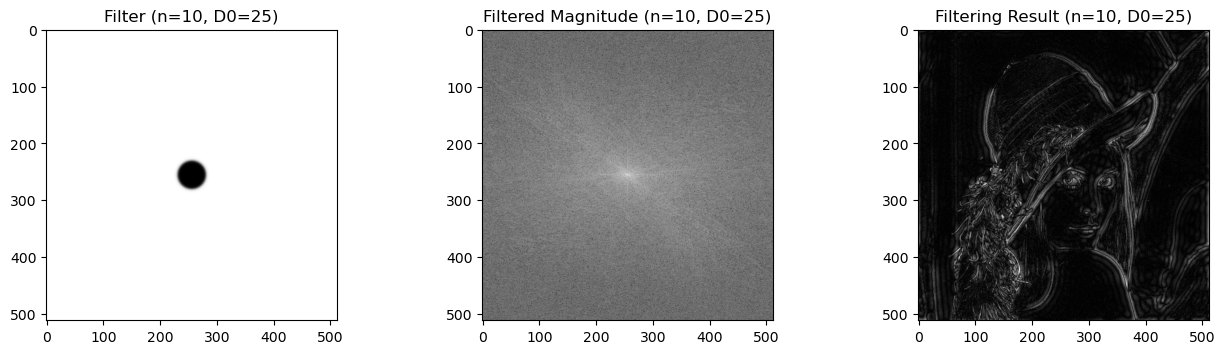

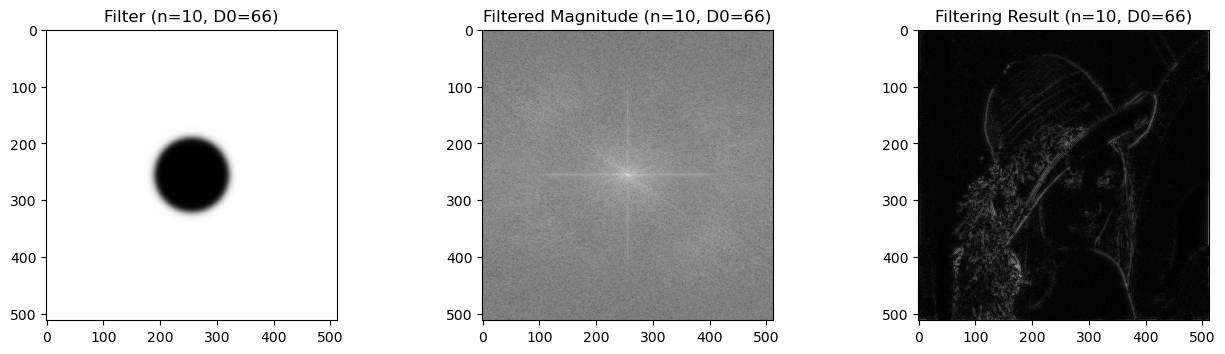

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('Lenna.png', 0)

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')


# Compute the Fourier transform of Lenna.png
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)
magnitude_spectrum = 20 * np.log(np.abs(F_shift))

# Show its magnitude
plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude of Fourier Transform')
plt.show()

def butterworthHighpassFilter(img, D0, n):
    # Compute the size of the image
    M, N = img.shape[:2]
    
    # Computing FT
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    
    # Create a Butterworth high pass filter
    H = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            Duv = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            if Duv == 0:
                H[u,v] = 0
            else:
                H[u,v] = 1 / (1 + (D0/Duv)**(2*n))
    
    G = fshift * H
    
    # take inverse FT
    gshift = np.fft.ifftshift(G)
    filtered_spectrum = np.fft.ifft2(gshift)
    
    filtered_img = np.abs(filtered_spectrum)
    
    return filtered_img, H



# Define parameters
n_values = [2, 10]
D0_values = [25, 66]


for n in n_values:
    for D0 in D0_values:
        
        # apply the filter
        filtered_img,H = butterworthHighpassFilter(img, D0, n)
        
        plt.figure(figsize=(15, 5))

        # show the filter 𝐻𝑖𝑔ℎ𝑃𝑎𝑠s,
        plt.subplot(1,3,1)
        plt.imshow(H, cmap='gray')
        plt.title('Filter ' f'(n={n}, D0={D0})') 
        

        #magnitude of the filtering result in frequency domain
        f = np.fft.fft2(filtered_img)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20 * np.log(np.abs(fshift))
        
        plt.subplot(1,3,2)
        plt.imshow(magnitude_spectrum, cmap='gray')
        plt.title('Filtered Magnitude ' f'(n={n}, D0={D0})')
        
        
        #the filtering result in spatial domain
        plt.subplot(1,3,3)
        plt.imshow(filtered_img, cmap='gray')
        plt.subplots_adjust(wspace=0.5)
        plt.title('Filtering Result ' f'(n={n}, D0={D0})')
        plt.show()
